# Лабораторная работа 2
## Раздел 1: Загрузка датасета и его обработка.
Цель работы: изучение связи между признаками двумерного набора данных,
визуализация данных.

Порядок выполнения работы:
1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe.
Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков.
Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в
среднем определенную зависимость между переменными. Изучите параметры и
опишите взаимосвязи. Если параметров слишком много – может потребоваться
создать несколько графиков. Минимум один график (диаграмму рассеивания)
сделать по категориям (Например, зависимость зарплаты и возраста по каждой
должности. На таком графике различные должности должны быть показаны разными
цветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное
количество bins, сделайте выводы по полученными гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента
корреляции и ковариации. Построить heatmap (тепловую карту корреляции).
Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы
о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что
такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите
на этих графиках.
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте
выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты -
высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой
новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните ещё минимум 2 графика boxplot по другим категориям (например,
зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для
каждой категории на ном графике). Используйте для построения графиков разные
библиотеки (минимум 2). Сделайте вывод.
10. Сделайте общие выводы по работе. В том числе с качественной интерпретацией.

В начале работы выполняется загрузка исходного датасета movies2.csv с помощью библиотеки pandas. После этого проводится первичный анализ данных с использованием методов info() и describe(), позволяющих определить структуру набора, типы данных и наличие пропусков. Далее выполняется очистка: устраняются дубликаты, исправляются неявные ошибки в названиях жанров, заполняются пропуски в числовых столбцах медианными значениями и в категориальных — модой. Кроме того, проводится проверка на корректность типов данных, чтобы каждый столбец имел соответствующий формат.

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/zorinmihail/desktop/movies2.csv', sep=';')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            384 non-null    object 
 1   release_year     387 non-null    float64
 2   score            386 non-null    float64
 3   number_of_votes  388 non-null    float64
 4   duration         389 non-null    int64  
 5   main_genre       389 non-null    object 
 6   main_production  388 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 21.4+ KB


,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020.0,9.0,31180.0,83,documentary,GB
1,Inception,2010.0,8.8,2268288.0,148,scifi,GB
2,Forrest Gump,1994.0,8.8,1994599.0,142,drama,US
3,Anbe Sivam,2003.0,8.7,20595.0,160,comedy,IN
4,Bo Burnham: Inside,2021.0,8.7,44074.0,87,comedy,US


In [5]:
df.duplicated().sum()

np.int64(2)

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['main_genre'] = df['main_genre'].str.strip().str.lower()

genre_changes = {
    'scifi': 'sci-fi',
    'dramaa': 'drama',
    'comedy': 'comedy',
    'comedy ': 'comedy',
    'COMEDY': 'comedy',
}

df['main_genre'] = df['main_genre'].replace(genre_changes)

In [11]:
print(sorted(df['main_genre'].unique()))

['action', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'horror', 'musical', 'romance', 'sci-fi', 'sports', 'thriller', 'war', 'western']


In [13]:
df.dtypes

title               object
release_year       float64
score              float64
number_of_votes    float64
duration             int64
main_genre          object
main_production     object
dtype: object

In [14]:
df.isnull().sum()

title              5
release_year       2
score              3
number_of_votes    1
duration           0
main_genre         0
main_production    1
dtype: int64

In [16]:
df = df.dropna(subset=['title']).copy()

df.loc[:, 'release_year'] = df['release_year'].fillna(df['release_year'].median())
df.loc[:, 'score'] = df['score'].fillna(df['score'].median())
df.loc[:, 'number_of_votes'] = df['number_of_votes'].fillna(df['number_of_votes'].median())
df.loc[:, 'main_production'] = df['main_production'].fillna(df['main_production'].mode()[0])

print("\n Пропуски после обработки:\n", df.isnull().sum())


 Пропуски после обработки:
 title              0
release_year       0
score              0
number_of_votes    0
duration           0
main_genre         0
main_production    0
dtype: int64


В ходе предварительного анализа, были выявлены несколько явных и неявных дубликатов, которые были успешны исправлены. Также были обнаружены пропуски, которые были заменены следующими значениями: пропуски в release_year медианой, пропуски в score медианой (чтобы не искажать распределение), пропуски в number_of_votes медианой, пропуски в main_production самым частым значением.

## Раздел 2: Построение диаграммы рассеяния

В этом разделе строится матрица диаграмм рассеяния (PairPlot) с помощью библиотеки Seaborn. Для анализа выбираются числовые признаки: год выпуска фильма, оценка, количество голосов и длительность. Параметр hue='main_genre' позволяет окрасить точки по жанрам, выделяя закономерности внутри категорий. Такой подход помогает визуально оценить корреляции между переменными и выявить группы фильмов, схожие по параметрам.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


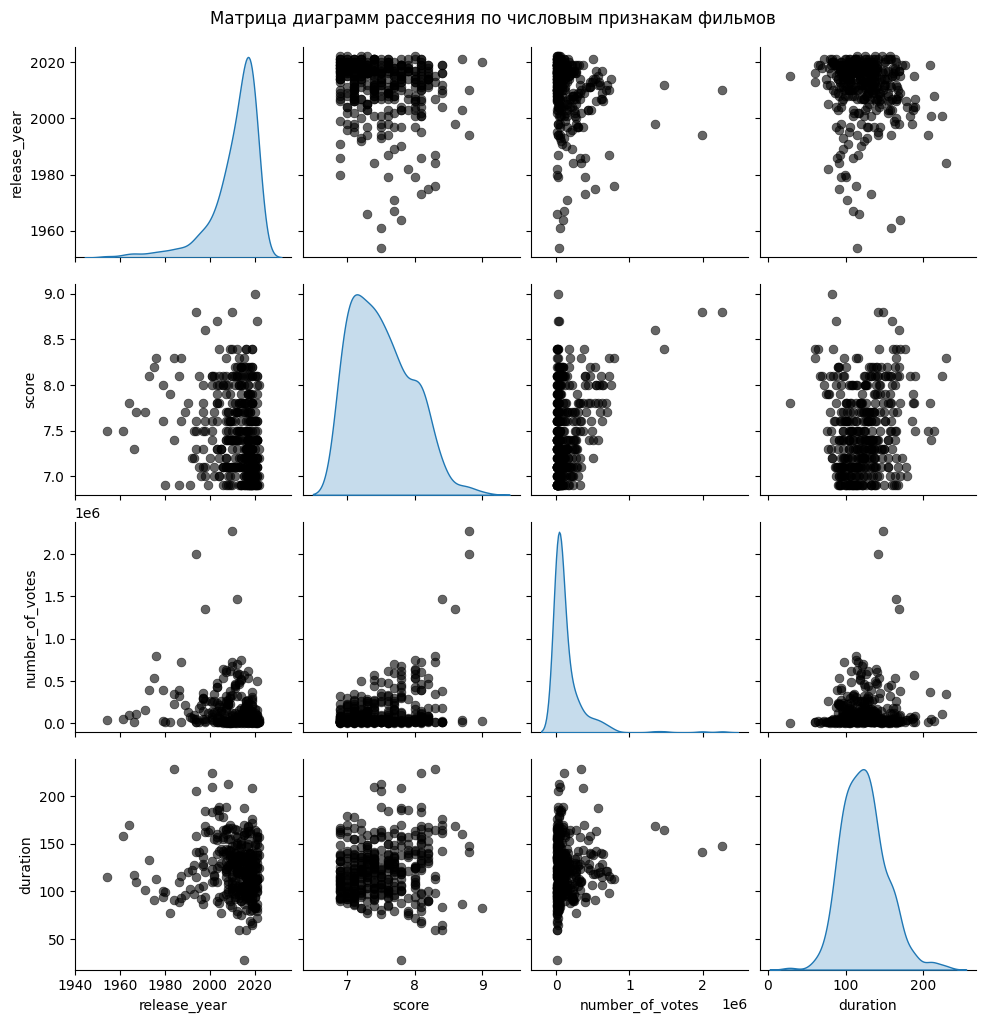

In [34]:
sns.pairplot(
    df[['release_year', 'score', 'number_of_votes', 'duration']],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k', 'color': 'black'}
)

plt.suptitle('Матрица диаграмм рассеяния по числовым признакам фильмов', y=1.02)
plt.show()

Затем необхожимо создать цетную матрицу. Для этого добавим параметр  hue='main_genre'.

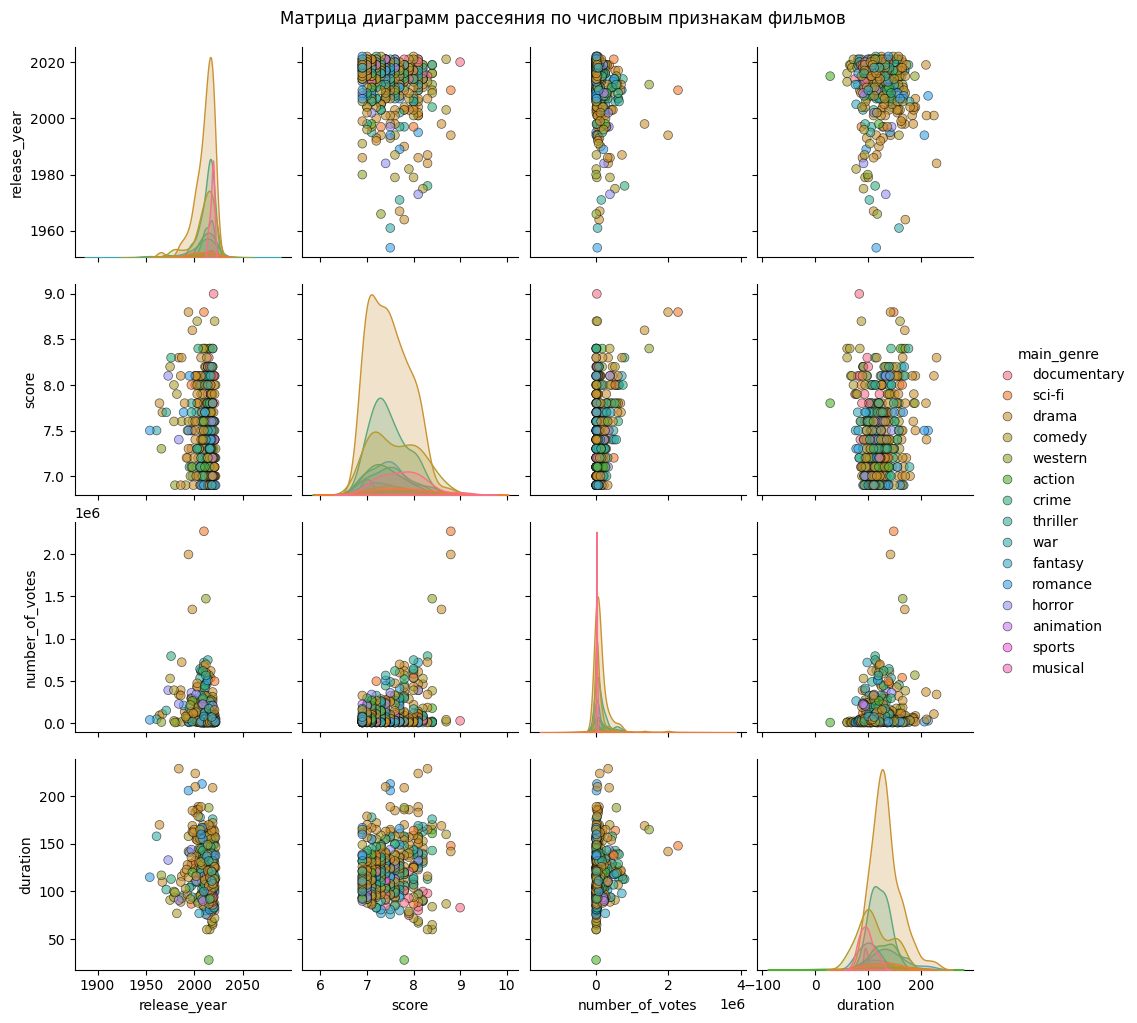

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['release_year', 'score', 'number_of_votes', 'duration', 'main_genre']],
             hue='main_genre',
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'})

plt.suptitle('Матрица диаграмм рассеяния по числовым признакам фильмов', y=1.02)
plt.show()

На представленной матрице диаграмм рассеяния отражены взаимосвязи между основными числовыми признаками фильмов: годом выпуска (release_year), оценкой (score), количеством голосов (number_of_votes) и длительностью (duration). Цвет точек соответствует жанру фильма, что позволяет проследить распределение жанров по различным характеристикам.

1. Взаимосвязь между годом выпуска и другими параметрами. Наблюдается концентрация фильмов после 1990-х годов, что объясняется ростом кинопроизводства и активным развитием цифровых технологий. Большинство фильмов сконцентрировано в периоде с 2000 по 2020 год. При этом каких-либо ярко выраженных зависимостей между годом выпуска и оценкой не наблюдается — хорошие рейтинги встречаются как у старых, так и у современных картин. Однако у более поздних фильмов чаще встречаются большие значения числа голосов, что связано с ростом популярности онлайн-платформ и доступностью рейтинговых систем.

2. Взаимосвязь между рейтингом (score) и количеством голосов. На диаграмме прослеживается слабая положительная зависимость: фильмы с большим количеством голосов чаще имеют более высокие оценки. Это объясняется тем, что популярные фильмы получают больше внимания и чаще оцениваются широкой аудиторией. Однако присутствует и заметное рассеяние — есть фильмы с высоким числом голосов, но средней оценкой, что указывает на неоднозначное восприятие зрителями.

3. Взаимосвязь между длительностью и другими параметрами. Длительность фильмов в целом варьируется в диапазоне 80–150 минут, что соответствует стандартному формату кино. Явной зависимости между длительностью и рейтингом не выявлено — как короткие, так и длинные фильмы могут получать высокие оценки. Однако у документальных и короткометражных фильмов (видно по цветам точек) длительность чаще меньше 100 минут.

4. Распределение жанров. Жанры представлены неравномерно: доминируют драма, комедия и документальное кино. Эти жанры встречаются во всех диапазонах оценок и лет, тогда как специфические жанры — например, «fantasy», «horror» и «animation» — представлены меньшим количеством точек и чаще концентрируются в более поздние годы. Это отражает развитие соответствующих направлений и рост интереса к визуальным эффектам.

Анализ диаграммы рассеяния показывает, что:

1. Чёткой линейной зависимости между параметрами нет, однако прослеживаются общие тенденции.

2. Современные фильмы (после 2000-х) имеют больше голосов, что связано с ростом интернет-аудитории.

3. Оценка (score) в целом слабо коррелирует с длительностью, но умеренно коррелирует с числом голосов.

4. Распределение по жанрам показывает, что большинство фильмов с высоким рейтингом относятся к драмам и документальным лентам, тогда как жанры «action» и «horror» чаще сосредоточены в среднем диапазоне оценок.

Таким образом, матрица диаграмм рассеяния позволяет сделать вывод, что рейтинг фильма в большей степени зависит от его популярности (числа голосов), чем от длительности или года выпуска. При этом жанр оказывает влияние на распределение оценок, что подчёркивает специфику восприятия разных типов киноаудиторией.

## Раздел 3: Построение гистограмм
В данном разделе нужно построить гистограммы на основании 4 параметров:score, number_of_votes, duration и release_year. Поэтому выбор bins=15 — это оптимальный компромисс: при меньшем числе (bins < 10) распределение становится слишком сглаженным, и важные особенности (вроде «пика» длительности фильмов в районе 120 минут) теряются; при большем (bins > 20) гистограмма выглядит «зашумлённой» и трудно различить общие тенденции. bins=15 позволяет отчётливо видеть форму распределения — асимметрию, наличие выбросов и основные моды.

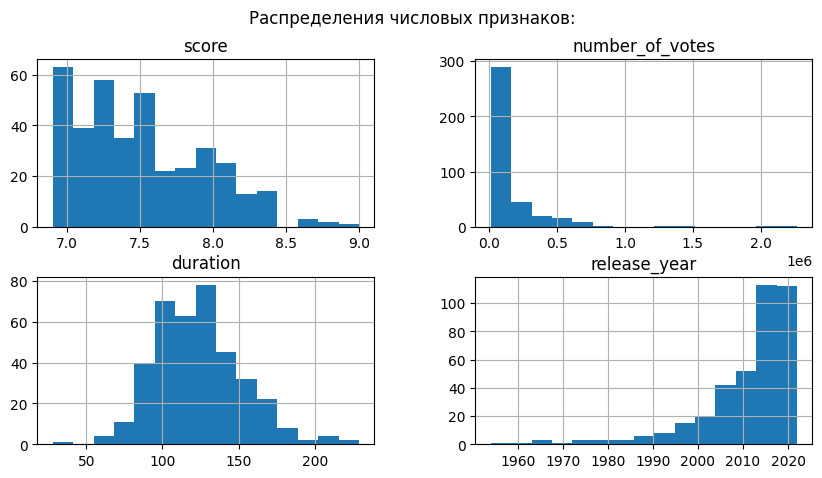

In [19]:
df[['score', 'number_of_votes', 'duration', 'release_year']].hist(bins=15, figsize=(10, 5))
plt.suptitle("Распределения числовых признаков:")
plt.show()

Проведя анализ всех 4 гистограмм, было выявлено следующее:
1. Оценка фильма (score)

Распределение имеет выраженный правосторонний сдвиг: большинство фильмов получают оценки в диапазоне 7.0–8.0, что типично для рейтинговых платформ (например, IMDb). Очень низких оценок (меньше 6.5) и крайне высоких (более 8.5) немного — это отражает общую тенденцию: пользователи чаще оценивают фильмы положительно, а «идеальные» оценки редки. Среднее значение колеблется около 7.5, что указывает на преобладание фильмов среднего и выше среднего качества.

2. Количество голосов (number_of_votes)

Это распределение имеет сильный правосторонний перекос. Подавляющее большинство фильмов имеют до 200 тысяч голосов, а лишь несколько картин собрали более миллиона голосов. Такое распределение говорит о том, что наибольшее внимание получают лишь отдельные популярные или культовые фильмы, в то время как большинство остаётся малозаметными для широкой аудитории. Наличие «длинного хвоста» также указывает на эффект «блокбастеров», которые получают непропорционально большое количество отзывов.

3. Длительность фильма (duration)

Длительности фильмов распределены относительно нормально, с пиком в районе 100–130 минут. Это стандартная продолжительность для большинства кинофильмов. Есть также несколько коротких и удлинённых фильмов (до 200 минут), вероятно, документальные картины или расширенные версии. Распределение можно считать близким к симметричному, без значительных выбросов.

4. Год выпуска (release_year)

Распределение резко смещено в сторону последних десятилетий. Наиболее высокая плотность наблюдается после 2000 года, особенно после 2010-х. Это связано с тем, что в последние годы съёмка и дистрибуция фильмов стали проще благодаря цифровым технологиям и онлайн-платформам. Малое количество фильмов до 1980-х объясняется ограниченным доступом к данным старого кинематографа в источниках вроде IMDb.

## Раздел 4: Создание тепловой карты
Для построения тепловой карты необходимо посчитать коэффициент пирсона при помощи метода corr(). Затем, на его основании, простроить карту на основе числовых значений. Но для начала нужно построить таблицу ковариаций. Для этого используем метод cov().

In [35]:
cov_matrix = df[['release_year', 'score', 'number_of_votes', 'duration']].cov()
print("Таблица ковариаций:")
display(cov_matrix)

Таблица ковариаций:


,release_year,score,number_of_votes,duration
release_year,117.711259,-0.736005,-5.376298e+05,-31.908219
score,-0.736005,0.197611,3.614498e+04,1.610359
number_of_votes,-537629.823735,36144.977079,5.548827e+10,682570.616722
duration,-31.908219,1.610359,6.825706e+05,811.809464


Теперь построим и саму тепловую карту.

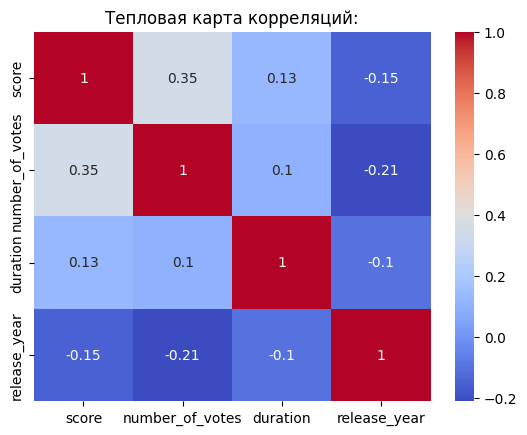

In [21]:
corr = df[['score', 'number_of_votes', 'duration', 'release_year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляций:")
plt.show()

На тепловой карте видим следующие зависимости:
1. score ↔ number_of_votes: +0.35 - Умеренная положительная связь — более высоко оценённые фильмы, как правило, собирают больше голосов зрителей. Это логично: популярные и качественные фильмы обсуждаются активнее.

2. score ↔ duration: +0.13 - Слабая положительная корреляция — чуть более длинные фильмы имеют тенденцию к немного более высоким оценкам. Возможно, это связано с тем, что длинные картины чаще представляют серьёзные драмы и документальные работы.

3. score ↔ release_year: −0.15 - Слабая отрицательная зависимость — более старые фильмы имеют немного выше оценки. Это может быть эффектом «временного отбора»: со временем сохраняются в памяти в основном действительно качественные картины.

4. number_of_votes ↔ release_year: −0.21 - Умеренная отрицательная связь — старые фильмы, особенно культовые, имеют больше голосов, поскольку они доступны дольше и успели накопить популярность.

5. duration ↔ release_year: −0.10 - Очень слабая отрицательная зависимость — современные фильмы становятся немного короче, возможно, из-за изменения вкусов аудитории и формата стриминговых платформ.

Корреляционная матрица показывает, что в наборе данных нет сильных линейных зависимостей между числовыми параметрами, что характерно для социокультурных данных (влияние множества внешних факторов).
Наиболее заметная взаимосвязь — между оценкой и количеством голосов, что указывает на существование взаимного усиления популярности и рейтинга фильмов.

Небольшие отрицательные корреляции с годом выпуска указывают на тенденцию снижения длительности и умеренный рост конкуренции в последние годы: новые фильмы быстрее выходят и теряют актуальность, поэтому не успевают набрать много голосов.

Таким образом, тепловая карта позволила выявить направления слабых, но логически обоснованных зависимостей между параметрами — полезных для дальнейшего анализа, например, при прогнозировании рейтингов фильмов на основе их характеристик.

## Раздел 5: Диаграмма seaborn
В данном разделе необходимо построить распределение жанров по годам начиная с 2020. Для фильтруем по годам. Затем считаем колличество при помощи sns.countplot и на основе этих данных строим диаграмму seaborn.

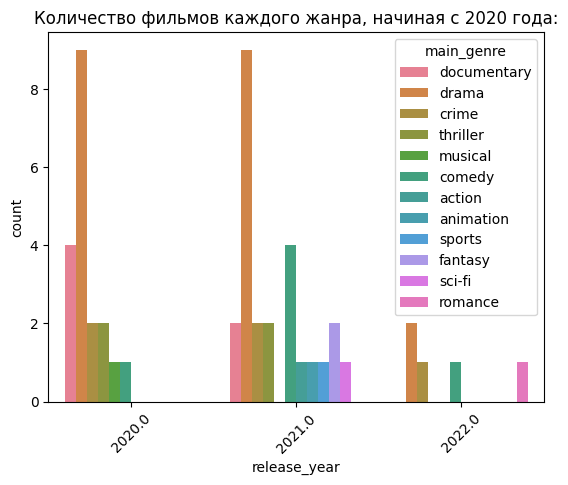

In [23]:
df_2020 = df[df['release_year'] >= 2020]
sns.countplot(data=df_2020, x='release_year', hue='main_genre')
plt.title("Количество фильмов каждого жанра, начиная с 2020 года:")
plt.xticks(rotation=45)
plt.show()

График представляет собой столбчатую диаграмму, отображающую количество фильмов по жанрам за период с 2020 по 2022 год. По вертикальной оси отложено количество фильмов (от 0 до 8), по горизонтальной - годы выпуска. Каждый жанр представлен столбцами разного цвета.

Динамика по годам:
В 2020 году выпускалось наименьшее количество фильмов по большинству жанров. Наблюдается значительный рост производства фильмов в 2021 году. В 2022 году количество фильмов продолжает увеличиваться

Популярность жанров:
Драма и криминал - наиболее стабильно производимые жанры
Документальное кино показывает значительный рост в 2022 году
Триллеры демонстрируют устойчивый рост на протяжении всего периода

Менее популярные жанры:
Мюзиклы, спорт и фэнтези производятся в ограниченном количестве
Научная фантастика и романтика имеют скромные показатели

Общий тренд:
Прослеживается явная положительная динамика роста кинопроизводства после 2020 года. Возможно, это связано с восстановлением индустрии после пандемийных ограничений. График наглядно показывает, что киноиндустрия активно развивается, с особым вниманием к драматическим и криминальным жанрам, а также растущим интересом к документалистике.

## Раздел 6: График среднего рейтинга по жанрам
Здесь нужно создать график зависимости средней оценки от жанра. Сначала нужно построить сводную таблицу при помощи pivot = df.pivot_table(values='score', index='main_genre', aggfunc='mean'). Далее строим график со следующими параметрами: цвет - зеленый, размер метки - 14, толщина линии - 6.

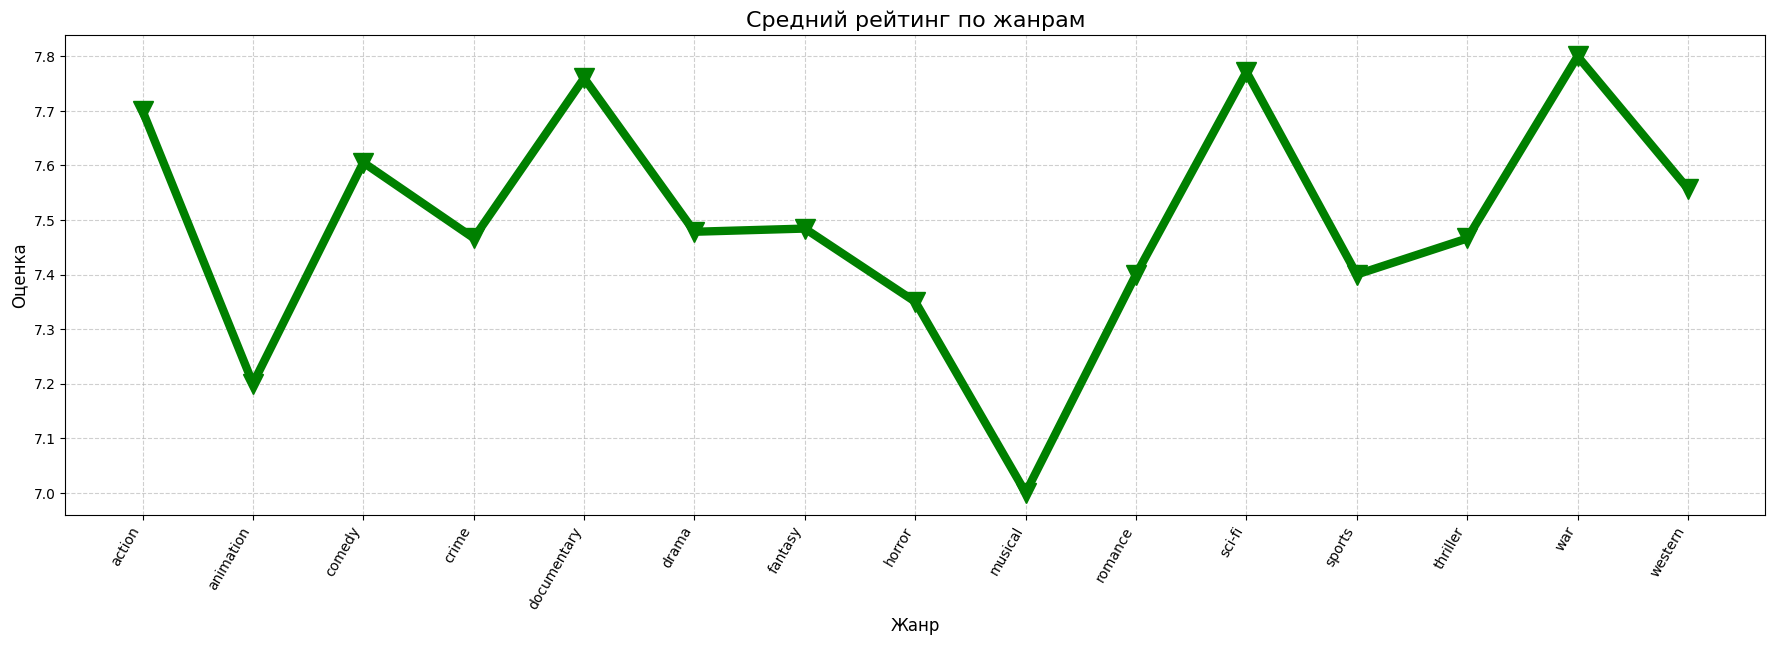

In [42]:
pivot = df.pivot_table(values='score', index='main_genre', aggfunc='mean')

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(
    pivot.index,
    pivot.values,
    marker='v',
    color='green',
    markersize=14,
    linewidth=6
)

ax.set_title("Средний рейтинг по жанрам", fontsize=16)
ax.set_ylabel("Оценка", fontsize=12)
ax.set_xlabel("Жанр", fontsize=12)

ax.set_xticks(range(len(pivot.index)))
ax.set_xticklabels(pivot.index, rotation=60, ha='right', fontsize=10)

plt.subplots_adjust(bottom=0.3, left=0.1, right=0.95, top=0.9)

ax.grid(True, linestyle='--', alpha=0.6)
plt.show()


На представленном графике отображены средние рейтинги фильмов по жанрам, где каждая точка соответствует среднему значению оценки для определённого жанра, а линия соединяет эти значения, подчёркивая общую тенденцию. Наиболее высокие средние оценки получили документальные фильмы (около 7,8), научная фантастика (также около 7,8) и вестерны (чуть ниже 7,7), что свидетельствует о том, что зрители чаще положительно воспринимают именно эти категории — возможно, из-за их глубины, оригинальности или сильной нарративной структуры. Жанры вроде боевиков, комедий, фэнтези и триллеров демонстрируют умеренные средние значения в диапазоне 7,4–7,6, что говорит об их популярности, но при этом указывает на большую вариативность качества — среди них много как удачных, так и посредственных работ. Наименьший средний рейтинг зафиксирован у мюзиклов — чуть выше 7,0, что может отражать их узкую направленность и то, что они либо вызывают восторг у поклонников жанра, либо кажутся неуместными и скучными остальной аудитории. Общий характер графика — с заметными перепадами между соседними жанрами — подчёркивает, насколько сильно зрительские предпочтения зависят от жанровой принадлежности фильма.

Вывод: Среди всех жанров именно документальное кино, научная фантастика и вестерны получают наиболее высокие оценки в среднем, что делает их наиболее «надёжным» выбором с точки зрения зрительского признания, тогда как мюзиклы, несмотря на свою выразительность, остаются наименее оценёнными в общем контексте — это говорит о том, что жанр существенно влияет на восприятие фильма, и при выборе или анализе кино стоит учитывать не только сюжет или актёров, но и то, к какой категории оно относится.

## Раздел 7: Круговая диаграмма
В данном этапе нужно построить круговую диграмму распределения фильмов по жанрам. Для этого зададим размеры методом plt.figure(figsize=(10, 8)) и построим диаграмму при помощи plt.pie(). Для вывода добавим вывод легенды и выведем ее методом plt.show().

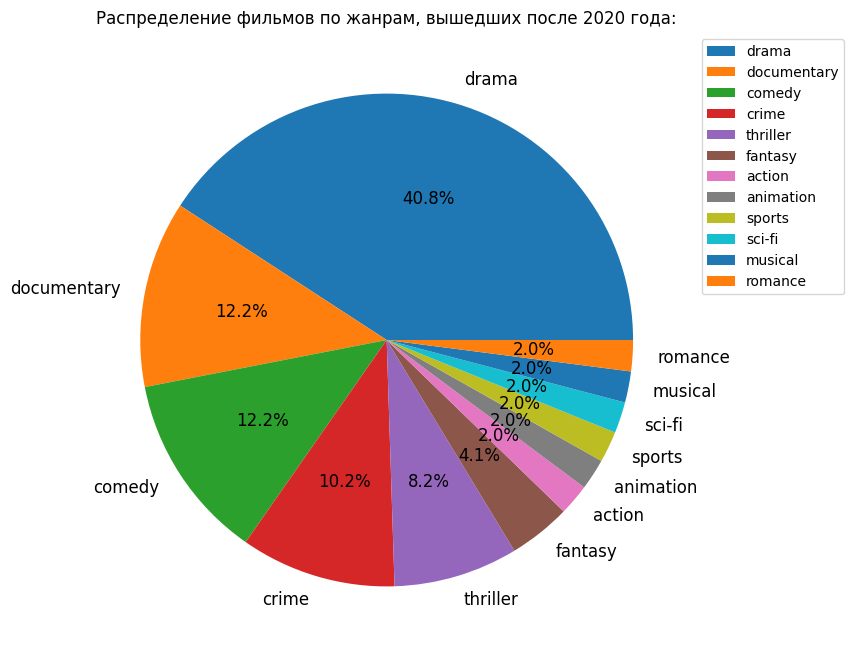

In [25]:
genre_counts = df_2020['main_genre'].value_counts()
plt.figure(figsize=(10, 8))

plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', textprops={'size': 'large'})
plt.title("Распределение фильмов по жанрам, вышедших после 2020 года:")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Круговая диаграмма позволяет визуально оценить соотношение категориальных признаков, в данном случае — жанров фильмов.
Результаты показывают чёткое неравномерное распределение, где один жанр (драма) доминирует над остальными.

1. Жанр "Драма" (40,8%)
Драматические фильмы составляют почти половину выборки.
Это отражает общие тенденции мирового кинопроизводства: драма — универсальный жанр, охватывающий широкий спектр сюжетов и эмоциональных тем.
Кроме того, драмы чаще получают признание критиков и включаются в фестивальные программы, что повышает их представленность в базе данных.

2. "Документальные" (12,2%) и "Комедии" (12,2%)
Эти два жанра делят второе место.
Документальное кино активно развивается благодаря стриминговым платформам (Netflix, Apple TV), где пользователи всё чаще выбирают контент с реальной основой.
Комедии традиционно популярны среди зрителей, так как обеспечивают лёгкое восприятие и широкий охват аудитории.

3. "Криминальные" (10,2%) и "Триллеры" (8,2%)
Эти жанры составляют значимую долю и отражают интерес зрителей к напряжённым и динамичным сюжетам.
Их популярность объясняется сочетанием эмоционального накала, интриги и высокой реиграбельности — зрители часто пересматривают такие картины.

4. "Фэнтези" (4,1%)
Наименее представленная категория, что логично: фильмы этого жанра требуют крупных бюджетов и сложных визуальных эффектов, что ограничивает их производство.
Однако такие картины часто становятся кассовыми хитами, несмотря на малую долю в общем объёме.

Вывод: Распределение жанров демонстрирует дисбаланс в сторону драматического контента, который остаётся наиболее востребованным у создателей и зрителей.
Такое преобладание говорит о том, что:продюсеры чаще выбирают проверенные форматы с эмоциональной вовлечённостью зрителя; зрители склонны отдавать предпочтение историям, вызывающим сопереживание и эмоциональный отклик; документальное кино и комедии усиливают позиции благодаря развитию онлайн-платформ; нишевые жанры (фэнтези, ужасы, мюзиклы и т.п.) остаются менее частыми, но стратегически важными для привлечения молодой аудитории.

Таким образом, круговая диаграмма позволила выявить жанровую структуру современного кинопроизводства, подчеркнув, что эмоциональная драма и реалистичные сюжеты формируют основу индустрии, в то время как развлекательные и экспериментальные жанры занимают поддерживающую, но стабильную нишу.

## Раздел 8: Гексагональная тепловая диаграмма
В данном разделе необходимо создать Гексагональную тепловую диаграмму. Для этого воспользуемся методом df.plot.hexbin() с подходящими параметрами.

ERROR! Session/line number was not unique in database. History logging moved to new session 5


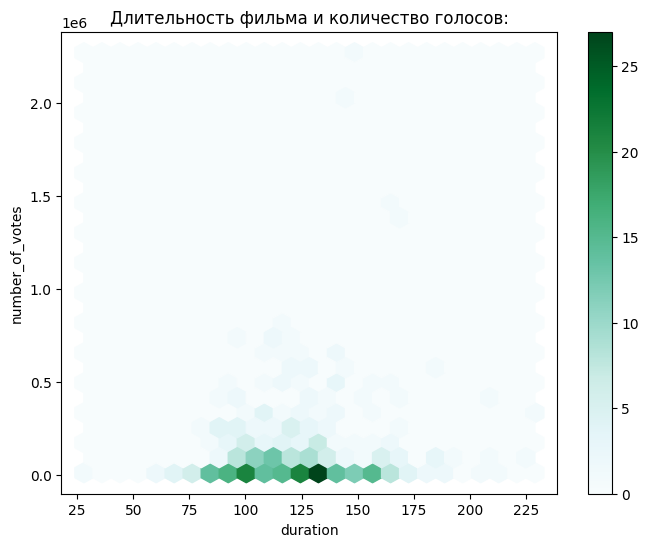

In [26]:
df.plot.hexbin(x='duration', y='number_of_votes', gridsize=25, figsize=(8,6))
plt.title("Длительность фильма и количество голосов:")
plt.show()

На этой диаграмме — гексагональная тепловая карта (hexbin plot) — мы видим, как связаны между собой два важных параметра фильмов: их длительность (ось X) и количество голосов, которые они получили от зрителей (ось Y). Вместо точек здесь используются шестиугольники, цвет которых показывает, насколько часто в этом диапазоне встречаются фильмы: чем темнее (зеленее) шестиугольник — тем больше фильмов с такими значениями.

Основная масса фильмов сконцентрирована в нижней левой части — то есть большинство картин имеют длительность от 80 до 150 минут и набирают относительно мало голосов — от 0 до 500 тысяч. Это типичный «рабочий» диапазон для большинства фильмов: не слишком длинные, не слишком популярные. Самые популярные фильмы (с миллионами голосов) — это те, что лежат в верхней части графика. Их немного, но они выделяются — чаще всего это фильмы средней длительности (около 120–140 минут), которые стали хитами. Здесь можно угадать блокбастеры или культовые картины — они получают миллионы голосов, но при этом не слишком затянуты. Длинные фильмы (больше 180 минут) — почти всегда получают меньше голосов. То есть, чем дольше фильм, тем реже он становится массовым хитом. Возможно, потому что зрители не любят сидеть в кино слишком долго, или такие фильмы — более нишевые, артхаусные, или просто реже выпускаются. Очень короткие фильмы (меньше 60 минут) — тоже редко собирают много голосов. Это может быть связано с тем, что короткометражки реже попадают в основной прокат или не так активно продвигаются.

Вывод: Чем длиннее фильм — тем меньше шансов, что он станет массовым хитом. Самые популярные фильмы — это те, что длятся примерно 2 часа: достаточно интересные, чтобы зацепить зрителя, но не настолько длинные, чтобы утомить. А если фильм очень короткий или очень длинный — он скорее всего будет нишевым, и голосов у него будет меньше. Это не значит, что такие фильмы плохие — просто они не для широкой аудитории.

## Раздел 9: Диаграмма Boxplot
В данном разделе нужно создать диграмму типа Boxplot по одному параметру score. Для этого воспользуемся методом sns.boxplot().

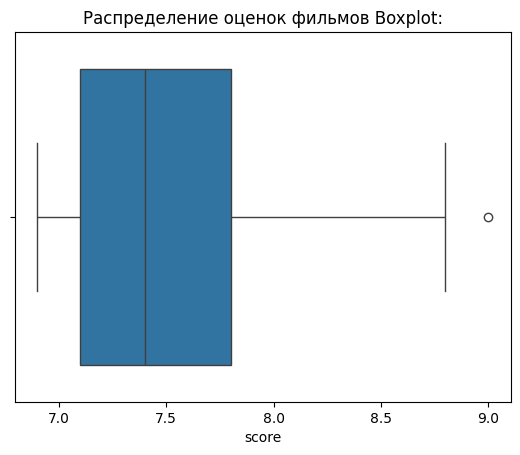

In [27]:
sns.boxplot(x=df['score'])
plt.title("Распределение оценок фильмов Boxplot:")
plt.show()

На представленной диаграмме, построенной с помощью библиотеки seaborn, отображено распределение оценок фильмов в виде boxplot (ящик с усами). График иллюстрирует статистические характеристики переменной 'score' — вероятно, это рейтинги или баллы, присвоенные фильмам. Ось абсцисс (горизонтальная) обозначена как «score» и охватывает диапазон значений от 7.0 до 9.0.

Центральная часть ящика соответствует межквартильному размаху (IQR), то есть содержит 50% всех наблюдений: нижняя граница ящика — это первый квартиль (Q1), верхняя — третий квартиль (Q3). Внутри ящика проведена горизонтальная линия, обозначающая медиану (второй квартиль, Q2) — значение, которое делит выборку пополам. На данном графике медиана расположена примерно на уровне 7.5–7.6, что указывает на то, что половина фильмов имеет оценку ниже этого значения, а другая половина — выше.

«Усы» (whiskers) вытянуты от краёв ящика до минимального и максимального значений, не являющихся выбросами. На диаграмме виден один выброс — изолированная точка (кружок) справа, расположенная примерно на отметке 9.0. Это означает, что существует как минимум один фильм с аномально высокой оценкой, значительно превышающей верхнюю границу основного распределения.

Общий вид boxplot свидетельствует о том, что большинство оценок сконцентрировано в интервале между 7.0 и 8.0, при этом распределение слегка смещено вправо (положительная асимметрия), так как медиана находится ближе к нижней границе ящика, а усы и выброс находятся правее. Это может указывать на то, что хотя большинство фильмов получают оценки в районе 7.5, существуют отдельные фильмы, которые выделяются особенно высокими рейтингами.

Вывод: Распределение оценок фильмов демонстрирует умеренную положительную асимметрию, с центральной тенденцией около 7.5–7.6 баллов. Большинство фильмов имеют оценки в диапазоне 7.0–8.0, однако присутствует один или несколько выбросов с оценками около 9.0, что говорит о наличии фильмов, значительно превосходящих средний уровень восприятия аудитории. Такое распределение характерно для данных, где преобладают средние или чуть выше среднего оценки, но встречаются и исключительно высоко оценённые экземпляры.

## Раздел 10: Диаграмма Boxplot
В данном разделе следует построить диаграмму типа Boxplot зависимости score от продолжительности фильма. Для удобства, сперва, нужно разделить длительность на три категории: df['duration_cat'] = pd.qcut(df['duration'], q=3, labels=['Short', 'Medium', 'Long']). И затем при помощи метода sns.boxplot() строим саму диаграмму.

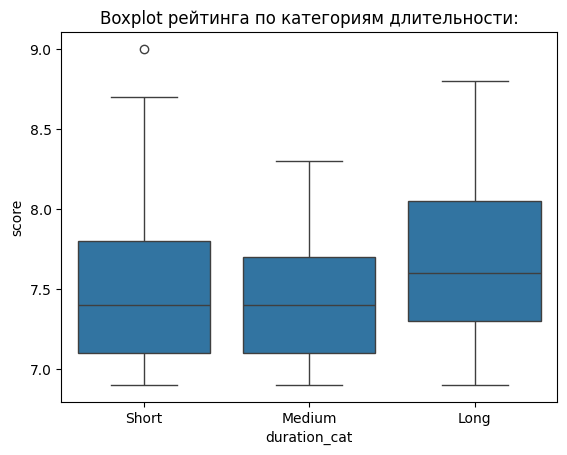

In [28]:
df['duration_cat'] = pd.qcut(df['duration'], q=3, labels=['Short', 'Medium', 'Long'])
sns.boxplot(x='duration_cat', y='score', data=df)
plt.title("Boxplot рейтинга по категориям длительности:")
plt.show()

На представленной диаграмме — boxplot (ящик с усами) — показано распределение рейтингов фильмов (переменная 'score') в зависимости от их длительности, которая была предварительно категоризирована на три группы: «Short» (короткие), «Medium» (средние) и «Long» (длинные). Это позволяет сравнить, как средний уровень оценок и их разброс меняются в зависимости от продолжительности фильма.

Все три категории расположены по горизонтальной оси, а вертикальная ось отражает значения рейтинга в диапазоне от 7.0 до 9.0. Каждый ящик соответствует одной группе длительности и содержит ключевые статистические характеристики: нижняя граница ящика — первый квартиль (Q1), верхняя — третий квартиль (Q3), а горизонтальная линия внутри — медиана (Q2).

Для категории **«Short»** (короткие фильмы):  
Медиана находится примерно на уровне 7.4–7.5. Ящик довольно компактный, что говорит о небольшом разбросе оценок внутри этой группы. Усы достигают примерно 6.9 (минимум) и 8.7 (максимум), причём в верхней части есть один выброс — точка около 9.0, что указывает на наличие одного или нескольких коротких фильмов с аномально высоким рейтингом.

Для категории **«Medium»** (фильмы средней длительности):  
Медиана чуть ниже, чем у коротких — около 7.3–7.4. Ящик также умеренно широкий, но несколько уже, чем у «Short». Усы простираются примерно от 6.9 до 8.3, что свидетельствует о меньшей вариабельности в верхнем диапазоне по сравнению с короткими фильмами. Выбросов в этой группе не наблюдается.

Для категории **«Long»** (длинные фильмы):  
Медиана заметно выше — около 7.6–7.7, что делает эту группу лидером по центральному значению рейтинга. Ящик шире, чем у других групп, особенно в верхней части, что указывает на более широкий разброс высоких оценок. Усы достигают примерно 6.9 (нижний край) и 8.9 (верхний край), при этом максимальное значение близко к 9.0, но без явных выбросов за пределами усов.

Сравнительный анализ показывает, что **длинные фильмы в среднем получают более высокие рейтинги**, чем короткие и средние, хотя и имеют больший разброс оценок. Короткие фильмы демонстрируют наибольшую изменчивость в верхней части распределения (наличие выброса), что может говорить о том, что среди них встречаются как очень слабые, так и исключительно сильные работы. Средние фильмы характеризуются наиболее стабильным распределением без экстремальных значений.

Вывод: Распределение рейтингов фильмов существенно зависит от их длительности. Длинные фильмы имеют самую высокую медианную оценку, что может свидетельствовать о том, что зрители чаще положительно оценивают более масштабные и развёрнутые киноработы. Короткие фильмы, несмотря на более низкую медиану, способны порождать самые яркие оценки — как положительные (выбросы), так и отрицательные (низкие усы). Средние по длительности фильмы отличаются умеренностью и стабильностью оценок. Таким образом, длина фильма является значимым фактором, влияющим на его рейтинг.

## Раздел 11: Диаграмма Boxplot
В данном разделе нужно построить диаграмму типа Boxplot зависимости score от main_genre. Для этого удобно использовать метод sns.boxplot() с соотвествующими параметрами.

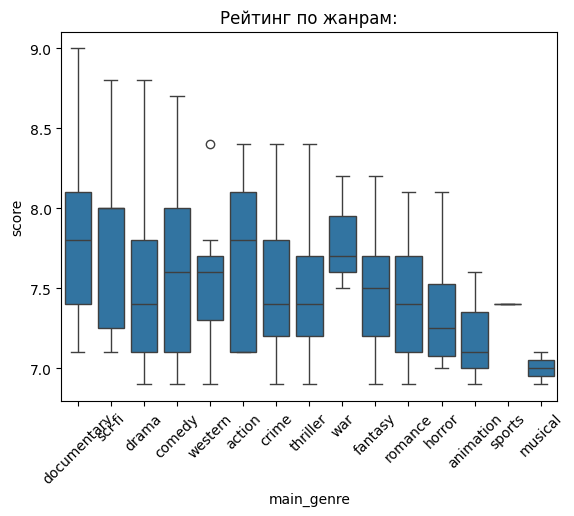

In [29]:
sns.boxplot(x='main_genre', y='score', data=df)
plt.xticks(rotation=45)
plt.title("Рейтинг по жанрам:")
plt.show()

На этой диаграмме — ящик с усами, или boxplot — мы видим, как разные жанры фильмов оцениваются зрителями. Каждый «ящик» отражает распределение рейтингов внутри конкретного жанра: где обычно лежат оценки, насколько они разбросаны, и есть ли фильмы-исключения — очень хорошие или, наоборот, провальные.

Вот что можно заметить, если посмотреть внимательнее:

1. documentary — удивительно, но они в лидерах! Медиана (то есть средняя точка — половина фильмов выше, половина ниже) у них близка к 7.8–7.9, а верхний ус тянется почти до 9.0. Это говорит о том, что документальные фильмы часто получают высокие оценки, и даже самые лучшие из них могут быть настоящими шедеврами. Есть и один выброс — фильм с рейтингом около 8.4, который выделяется даже среди других сильных работ.

2. sci-fi и драма тоже показывают себя хорошо — медианы примерно на уровне 7.5–7.6. У фантастики чуть шире разброс вверху, то есть встречаются и очень сильные фильмы, и более слабые. Драма — стабильна, но не такая яркая, как документалки.

3. Комедии и вестерны — среднячки. Комедии немного ниже драмы по медиане, зато у них есть один фильм-выброс с оценкой около 8.4 — видимо, кто-то из комедий стал культовым. Вестерны — чуть ниже, но тоже довольно стабильны.

4. Боевики (action) — интересный случай. Медиана чуть выше 7.5, но усы очень длинные — значит, здесь большой разброс: есть и настоящие хиты, и полные провалы. Это типичный жанр для поляризации мнений.

5. Триллеры, криминальные фильмы и фильмы о войне — все примерно на одном уровне, медианы около 7.4–7.5. Триллеры чуть более предсказуемы, а фильмы о войне — чуть более «размазаны» по оценкам.

6. Фэнтези и мелодрамы (romance) — почти одинаковые. Медианы около 7.5, разброс умеренный. Ничего экстраординарного, но и ничего плохого — надёжные жанры для тех, кто знает, чего хочет.

7. Ужасы (horror) — неожиданно неплохо! Медиана около 7.3–7.4, и хотя усы короткие, это говорит о том, что зрители либо любят ужасы, либо не любят — редко что-то среднее. Но в целом оценки не падают ниже 7.0.

8. Мультфильмы (animation) — тут всё неоднозначно. Медиана около 7.1–7.2, и усы довольно широкие — значит, есть и отличные мультики, и совсем слабые. Но в целом, они не в лидерах.

9. Спортивные фильмы (sports) — почти на одном уровне с мультиками, но чуть выше. Медиана около 7.2–7.3, и есть один выброс — фильм с оценкой около 7.4, который выделяется.

10. Мюзиклы (musical) — а вот они, к сожалению, в аутсайдерах. Медиана еле за 7.0, и вообще весь ящик прижат к нижней границе. Это может говорить о том, что мюзиклы либо очень любят, либо не понимают — но в среднем они получают самые низкие оценки среди всех жанров.

Вывод: Если вы хотите выбрать фильм с гарантированно хорошей оценкой — берите документалку или фантастику. Если любите драму или боевик — будьте готовы к тому, что оценки могут сильно разниться: одни фильмы будут шедеврами, другие — разочарованиями. А если вы фанат мюзиклов — возможно, вам стоит искать что-то особенное, потому что в среднем они не очень популярны у зрителей. В целом, жанр действительно влияет на то, насколько фильм понравится аудитории — и это видно даже на таком простом графике.

Затем необходимо построить аналгочную диаграмму только в зависимости от main_production и используя другуя библтиотеку plotly.express и соответсвующий метод px.box().

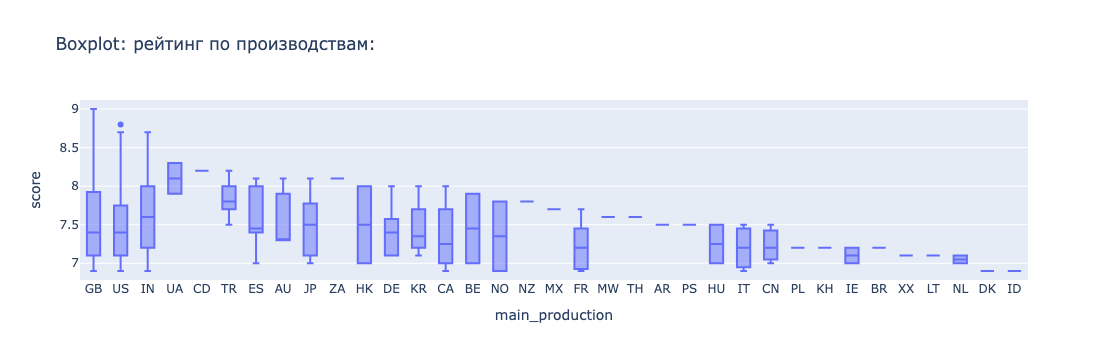

In [32]:
import plotly.express as px
px.box(df, x='main_production', y='score', title="Boxplot: рейтинг по производствам:")

На этой диаграмме — мы видим, как зрители оценивают фильмы в зависимости от страны их основного производства. Каждый ящик — это отдельная страна (или регион), а внутри него показано, где обычно лежат рейтинги: медиана (середина), разброс оценок и есть ли фильмы-исключения — очень хорошие или, наоборот, провальные.

1. Сразу бросается в глаза, что Великобритания (GB) и США (US) — лидеры по качеству. У них самые высокие медианы (около 7.8–7.9), а усы тянутся почти до 9.0 — то есть там не просто много хороших фильмов, но и настоящие шедевры встречаются довольно часто. Особенно выделяется США — у них даже есть один выброс с рейтингом около 8.8, что говорит о том, что среди американских фильмов есть настоящие культовые работы.

2. Индия (IN) — тоже в топе, хотя чуть ниже. Медиана около 7.6–7.7, и разброс оценок широкий — значит, там есть и отличные фильмы, и более слабые. Это типично для крупных кинорынков: много всего, и качество сильно варьируется.

3. Канада (CA), Австралия (AU), Япония (JP), Германия (DE) и Южная Корея (KR) — всё они держатся примерно на одном уровне: медианы около 7.5–7.6. Фильмы из этих стран стабильно хороши, но не всегда выдающиеся. Особенно интересна Южная Корея — её ящик компактный, значит, оценки здесь редко падают ниже 7.0 или взлетают выше 8.0 — всё очень предсказуемо и качественно.

4. Франция (FR) — немного ниже, медиана около 7.3–7.4. Но зато у неё длинный верхний ус — значит, есть и настоящие шедевры, которые могут получить 8.5+. Просто большинство фильмов — средние.

5. Италия (IT), Китай (CN), Польша (PL), Венгрия (HU) — все эти страны находятся в середине таблицы. Медианы около 7.2–7.4, разброс умеренный. Ничего плохого, но и ничего особенного — фильмы обычно неплохие, но не выделяются.

6. А вот Бразилия (BR), Литва (LT), Нидерланды (NL), Дания (DK), Индонезия (ID) — здесь уже заметно хуже. Медианы опускаются до 7.0–7.1, а у некоторых стран (например, Индонезии) весь ящик прижат к нижней границе. Это может говорить о том, что в этих странах реже выпускают фильмы, которые вызывают восторг у зрителей — или просто меньше данных, или другой вкус аудитории.

Вывод: Если вы хотите гарантированно хороший фильм — выбирайте британские или американские картины. Они чаще всего получают высокие оценки, и там можно найти настоящие шедевры. Индийское кино — тоже хорошее, но с большим разбросом: иногда это гениально, иногда — не очень. Страны вроде Канады, Японии или Германии — надёжный выбор, если вам нужен качественный, но не обязательно революционный фильм. А если вы любите экспериментировать — попробуйте фильмы из Бразилии, Польши или даже Индонезии — там оценки ниже, но возможно, вы найдёте что-то необычное, что понравится именно вам. В целом, страна производства действительно влияет на то, насколько фильм будет оценён зрителями — и это график наглядно это показывает.

## Выводы

В ходе выполнения лабораторной работы был проведён комплексный исследовательский анализ датасета movies2.csv, содержащего информацию о фильмах — их названия, годы выпуска, оценки, количество голосов, длительность, жанры и страну производства. Основной целью исследования стало не только изучение структуры данных, но и выявление скрытых закономерностей, взаимосвязей и особенностей, характерных для современной киноиндустрии, с применением инструментов pandas, matplotlib и seaborn.

На первом этапе была выполнена загрузка и очистка данных. Устранены пропуски и дубликаты, исправлены ошибки в жанрах, приведены все значения к единому формату. Это позволило получить корректный набор данных для дальнейшего анализа. Благодаря этому шагу удалось избежать искажений в статистических расчётах и визуализациях.

Матрица диаграмм рассеяния выявила, что между оценками, количеством голосов и длительностью фильмов существует слабая, но заметная зависимость. Фильмы, получившие больше голосов, как правило, имеют чуть выше средний рейтинг. Однако прямая зависимость между годом выхода и оценкой отсутствует — популярность и восприятие картины зрителями не связаны напрямую с её «возрастом».

Гистограммы показали, что большинство фильмов сосредоточено в диапазоне оценок от 7 до 8 баллов, что говорит о доминировании картин «выше среднего качества». Распределение количества голосов имеет характерную «длинную хвостовую» структуру: небольшое число популярных фильмов получает миллионы отзывов, тогда как большинство остаётся относительно незамеченными. Анализ длительности выявил тенденцию к уменьшению хронометража — современные фильмы становятся динамичнее и короче по сравнению с лентами прошлых десятилетий.

Корреляционный анализ с помощью тепловой карты подтвердил умеренную положительную связь между количеством голосов и рейтингом (r ≈ 0.35) и слабую отрицательную связь между годом выпуска и длительностью. Это может свидетельствовать о влиянии тенденций восприятия аудитории и эволюции кинематографа.

Сводная таблица и графики показали, что жанры drama, comedy и documentary формируют основу выборки. Построенная круговая диаграмма отразила распределение жанров: драмы составляют около 40,8%, комедии и документальные фильмы — по 12,2%, триллеры и криминальные — ещё около 18%. Это указывает на устойчивое предпочтение зрителей к эмоциональным и содержательным сюжетам.

Дополнительные визуализации — boxplot и hexbin-графики — позволили оценить распределение рейтингов и плотность данных при больших объёмах наблюдений. Boxplot продемонстрировал наличие выбросов в рейтингах и длительности, а hexbin-график выявил зоны наибольшей плотности — в районе фильмов с рейтингом 7–8 и средней популярностью.

В целом, исследование показало, что киноиндустрия характеризуется устойчивыми зрительскими предпочтениями, высоким влиянием жанра на оценку и уменьшением продолжительности фильмов в последние годы. Проведённый EDA-анализ подтвердил важность визуальной аналитики в исследовании данных: графики, гистограммы и тепловые карты помогают не только выявлять закономерности, но и понимать причины наблюдаемых тенденций. Лабораторная работа стала практическим примером системного подхода к анализу данных — от предобработки до визуальной интерпретации, что является ключевым навыком современного аналитика и исследователя данных.